In [3]:
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
import skimage

%matplotlib inline

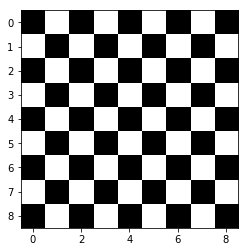

In [2]:
check = np.zeros((9,9))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
plt.imshow(check, cmap='gray', interpolation='nearest')

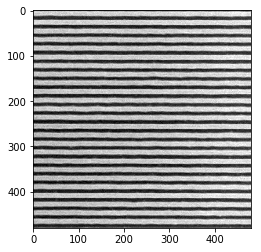

In [9]:
#image = cv2.imread('Manual-Window1-Top-CMix0-0516085358.Jpeg',0) #0 for grayscale

from skimage import io

image = io.imread('Manual-Window1-Top-CMix0-0516085358.Jpeg')

#logo = im.imread('http://scikit-image.org/_static/img/logo.png')
#print(logo.shape)
#logo = logo[0:141, 0:141]
plt.imshow(image)

In [10]:
image.dtype

dtype('uint8')

In [11]:
image.shape

(480, 480, 3)

0.420381365094


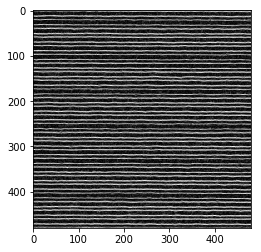

In [17]:
from skimage import filters, color

#convert image from rgb to grayscale
image = color.rgb2gray(image)
image_sobel = filters.sobel(image)
plt.imshow(image_sobel, cmap='gray')
print(image_sobel.max())

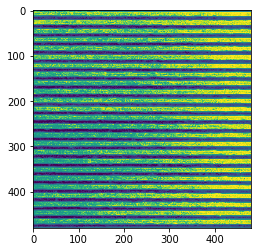

In [18]:
from skimage import exposure

image_equalized = exposure.equalize_hist(image)
plt.imshow(image_equalized)

0.501953125


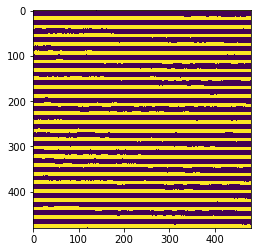

In [29]:
from skimage import filters
value = filters.threshold_otsu(image)
mask = image < value
plt.imshow(mask)
print(value)

(array([ 10735.,  39908.,  23045.,  12924.,  10759.,  10678.,  11848.,
         42013.,  58277.,  10213.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

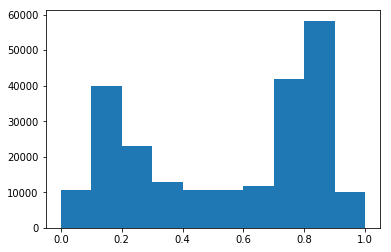

In [25]:
plt.hist(image.ravel()) #histogram

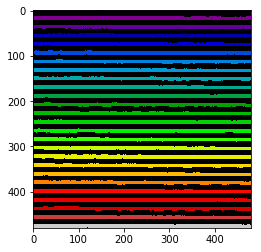

In [61]:
from skimage import measure

all_labels = measure.label(mask, background=0)

plt.imshow(all_labels, cmap=plt.cm.spectral)

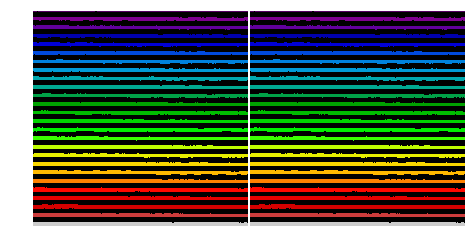

In [60]:
from scipy import ndimage
label_im, nb_labels = ndimage.label(mask)

sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mask_size = sizes < 1000
remove_pixel = mask_size[label_im]
label_im[remove_pixel] = 0
labels = np.unique(label_im)
label_clean = np.searchsorted(labels, label_im)

plt.figure(figsize=(6 ,3))

plt.subplot(121)
plt.imshow(label_im, cmap=plt.cm.spectral)
plt.axis('off')
plt.subplot(122)
plt.imshow(label_clean, vmax=nb_labels, cmap=plt.cm.spectral)
plt.axis('off')

plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0, left=0, right=1)
plt.show()

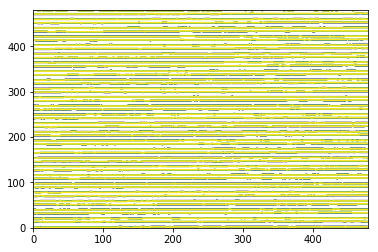

In [39]:
from skimage import segmentation

mask = image < filters.threshold_otsu(image)
clean_border = segmentation.clear_border(mask)
#plt.imshow(clean_border)
plt.contour(mask)

In [41]:
from skimage import viewer
from skimage.viewer.plugins import lineprofile

new_viewer = viewer.ImageViewer(image)
new_viewer += lineprofile.LineProfile()
new_viewer.show()

Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.


[(array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([ 0.10196078,  0.22647277,  0.42437691,  0.63546078,  0.80355556,
          0.87086057,  0.84017647,  0.77940033,  0.77401307,  0.79355392,
          0.81519608,  0.85490577,  0.8305098 ,  0.63037473,  0.35644662,
          0.19142157,  0.13195643,  0.07984259,  0.08454902,  0.11705664,
          0.22854031,  0.36      ,  0.6305817 ,  0.72288453,  0.86603922,
          0.8432598 ,  0.8031024 ,  0.80291667,  0.82436601,  0.86748148,
          0.85490196,  0.76624237,  0.57762092,  0.36744608,  0.20300654,
          0.1496732 ,  0.12807843,  0.10103377,  0.13588453,  0.22033824,
          0.42265795,  0.6925512 ,  0.81256863,  0.84051416,  0.82736383,
          0.84901961,  0.86123094,  0.85413017,  0.86039216,  0.90039815,
          0.88033769,  0.7

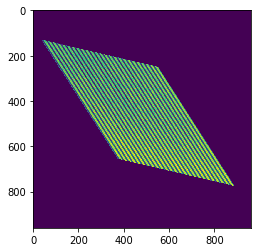

In [56]:
from skimage import feature
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform

tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.8, translation=(550,250))
new_image = warp(image, tform.inverse, output_shape=(960, 960))
plt.imshow(new_image)